For more contex on this code, please read the [README file](https://github.com/Chinnasf/Deep-Learning-and-NN/blob/master/README.md).

**Date of Creation**: Aug 11, 2020<br>
**Author**: Karina Chiñas Fuentes<br>
**Email**: chinnasf@outlook.de

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model

# Figure Parameters
import matplotlib
plt.style.use('seaborn-paper')
matplotlib.rcParams['xtick.labelsize']   = 10
matplotlib.rcParams['ytick.labelsize']   = 10
matplotlib.rcParams['lines.linewidth']   = 1
matplotlib.rcParams['axes.linewidth']    = 0.1

matplotlib.rcParams['xtick.major.size']  = 3.7
matplotlib.rcParams['xtick.major.width'] = 0.7
matplotlib.rcParams['xtick.minor.size']  = 1.7
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size']  = 3.7
matplotlib.rcParams['ytick.major.width'] = 0.7
matplotlib.rcParams['ytick.minor.size']  = 1.7
matplotlib.rcParams['ytick.minor.width'] = 0.7

%matplotlib inline

In [2]:
# Dataset 
X, Y = sklearn.datasets.make_moons(n_samples=350, noise=0.25) # dataset
X, Y = X.T, Y.reshape(1, Y.shape[0])

In [3]:
# Plot Decision Boundary
def plot_DB(model, X, y,title):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Greys)
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Set2)
    plt.title(title,fontsize=12)

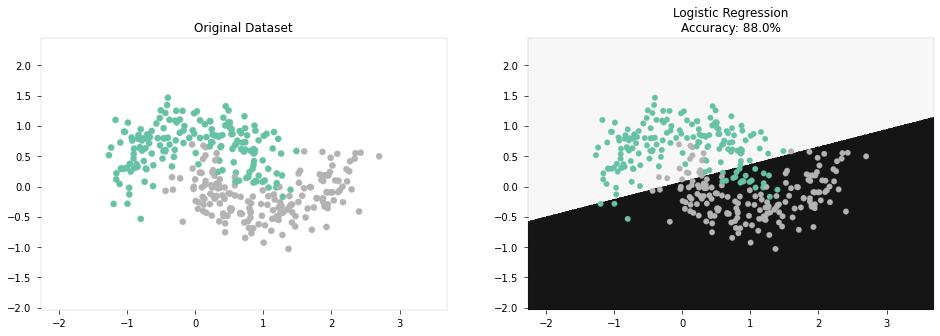

In [4]:
# Comparing the NN-model with a Logistic Regression classifier

plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Set2)
plt.title("Original Dataset", fontsize=12)

plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T.ravel());

# Plot the decision boundary for logistic regression
title = "Logistic Regression\nAccuracy: "+str(round(clf.score(X.T, Y.T.ravel())*100,2))+"%"
plot_DB(lambda x: clf.predict(x), X, Y,title)
plt.show()

The cost function that will be used for the two-layer NN is determined by:

<br>

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)}$$

<br>

In [5]:
# ------------------------------------------------------- 2-Layer Neural Network ----------------------------
# Step 1: compute initial values per parameter
def initial_values(n_x, n_h, n_y):

    np.random.seed(0) 
    W_1 = np.random.randn(n_h,n_x)*0.01
    b_1 = np.zeros((n_h,1))
    W_2 = np.random.randn(n_y,n_h)*0.01
    b_2 = np.zeros((n_y,1))
    
    parameters = {"W_1": W_1,"b_1": b_1,
                  "W_2": W_2,"b_2": b_2}
    
    return parameters

# Step 2: compute Forward Propagation
def FP(X, parameters):
    W_1,b_1 = parameters["W_1"], parameters["b_1"]
    W_2,b_2 = parameters["W_2"], parameters["b_2"]

    Z_1 = np.dot(W_1,X)  + b_1
    A_1 = np.tanh(Z_1)         # hyperbolic tangent for the first activation function
    Z_2 = np.dot(W_2,A_1) + b_2
    A_2 = (1/(1+np.exp(-Z_2))) # sigmoid for the second activation function
    
    cache = {"Z_1": Z_1,
             "A_1": A_1,
             "Z_2": Z_2,
             "A_2": A_2}
    
    return A_2, cache

# Step 3: compute cost function 
def Cost_J(A_2, Y, parameters):
    
    m = Y.shape[1] # number of example

    cost = (-1/m)*np.sum(np.multiply(np.log(A_2),Y) + np.multiply(np.log(1-A_2),1-Y))
    cost = float(np.squeeze(cost)) 

    return cost


# Step 4: compute Backward Propagation
def BP(parameters, cache, X, Y): 

    m = X.shape[1]

    W_1 = parameters["W_1"]
    W_2 = parameters["W_2"]

    A_1 = cache["A_1"]
    A_2 = cache["A_2"]

    dZ_2 = A_2-Y
    dW_2 = (1/m)*np.dot(dZ_2,A_1.T)
    db_2 = (1/m)*np.sum(dZ_2,axis=1,keepdims=True)
    dZ_1 = np.dot(W_2.T,dZ_2)*(1-np.power(A_1,2))
    dW_1 = (1/m)*np.dot(dZ_1,X.T)
    db_1 = (1/m)*np.sum(dZ_1,axis=1,keepdims=True)

    gradients = {"dW_1": dW_1,"db_1": db_1,
                 "dW_2": dW_2,"db_2": db_2}
    
    return gradients


# Step 5: update each parameter
def update_parameters(parameters, gradients, alpha_lr = 1.2):

    W_1 = parameters["W_1"]
    b_1 = parameters["b_1"]
    W_2 = parameters["W_2"]
    b_2 = parameters["b_2"]

    dW_1 = gradients["dW_1"]
    db_1 = gradients["db_1"]
    dW_2 = gradients["dW_2"]
    db_2 = gradients["db_2"]

    W_1 -= alpha_lr*dW_1   # each value is parameter as: Θ = Θ - αdΘ
    b_1 -= alpha_lr*db_1 
    W_2 -= alpha_lr*dW_2 
    b_2 -= alpha_lr*db_2 
    
    parameters = {"W_1": W_1,
                  "b_1": b_1,
                  "W_2": W_2,
                  "b_2": b_2}
    
    return parameters

# Step 6: predict values, needed for decision boundary plotting.
def predicted_vals(parameters, X):

    A_2, cache = FP(X, parameters)
    predictions = np.where(A_2 > 0.5, 1, 0)
    
    return predictions

def two_layer_NN(X, Y, n_h, num_iterations):

    np.random.seed(0)
    n_x = X.shape[0]
    n_y = Y.shape[0]

    parameters = initial_values(n_x, n_h, n_y)

    for i in range(num_iterations):
        A_2, cache = FP(X, parameters)
        cost = Cost_J(A_2, Y, parameters)
        gradients = BP(parameters, cache, X, Y)
        parameters = update_parameters(parameters, gradients)

    return parameters

In [6]:
size = 3 # Number of hidden units in the hidden layer

parameters = two_layer_NN(X, Y, n_h = size, num_iterations = 10000)

predictions = predicted_vals(parameters, X)
score='Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%'

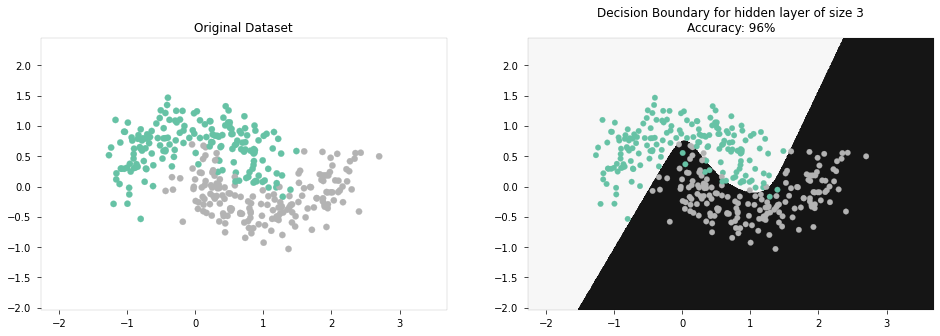

In [7]:
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Set2)
plt.title("Original Dataset", fontsize=12)

# Plot the decision boundary for two-layer neural network model
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
title = "Decision Boundary for hidden layer of size " + str(size) +"\n" + str(score)
plot_DB(lambda x: predicted_vals(parameters, x.T), X, Y,title)

plt.show();